## ПОСТРОЕНИЕ РЕГРЕССИОННОЙ МОДЕЛИ, ОПИСЫВАЮЩАЯ МЕЖКОНЦЕВУЮ ЗАДЕРЖКУ В СЕТИ С ЛИНЕЙНОЙ ТОПОЛОГИЕЙ

Имеются данные имитационной модели

\textbf{Цель:}  построить \textbf{регрессионной модель межконцевой задержки} в тандеме, имеющие следующие предикторы:

- RHOS - коэффициент загрузки ($\rho$);
- NUM_STATIONS -  количество станций в тандеме;
- NUM_PACKETS - число сгенерированных пакетов;
- BITRATE -  битовая скорость передачи пакета станциями;
- PKTSIZE - средний размер пакетов в битах.

\textbf{Необходимо:} провести оценку данной модели, а также сравнить ее с аналитической моделью межконцевой задержки для СМО $M/M/1 \rightarrow \bullet/M/1$.

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## ТАБЛИЦА ТРЕНИРОЧНЫХ ДАННЫХ

Для тренировки будем использовать данные симуляции, полученные с фиксации размеров данных (\textbf{sim_type = 'fix'})

In [2]:
table = pd.read_csv('table.csv', index_col=0)
table

sim_type  RHOS  NUM_STATIONS  NUM_PACKETS  BITRATE  PKTSIZE       delay  \
0         fix   0.1             5         2000     1000      500    3.153541   
1         fix   0.1             5         2000     1000     1000    6.484503   
2         fix   0.1             5         2000     1000     2000   12.434021   
3         fix   0.1             5         2000     1500      500    2.152927   
4         fix   0.1             5         2000     1500     1000    4.175801   
...       ...   ...           ...          ...      ...      ...         ...   
3883      var   0.9            20        20000     1500     1000  137.073985   
3884      var   0.9            20        20000     1500     2000  262.331304   
3885      var   0.9            20        20000     2000      500   53.294198   
3886      var   0.9            20        20000     2000     1000   92.352807   
3887      var   0.9            20        20000     2000     2000  165.472167   

         qsize     ssize      busy  fingerprint  
0     0.045621  0.146906  0.101352  9222.374776  
1     0.044956  0.145966  0.101117   156.888568  
2     0.038444  0.132845  0.094655  1144.404326  
3     0.042999  0.143870  0.100974  8404.431398  
4     0.044722  0.147766  0.103176  7663.373303  
...        ...       ...       ...          ...  
3883  7.706763  8.590372  0.889072  2175.846141  
3884  8.498980  9.395109  0.902368  1319.182265  
3885  7.536773  8.418871  0.895265  8203.066771  
3886  7.942748  8.812087  0.882098  2327.322851  
3887  6.950867  7.822940  0.885158  9957.835281  

[3888 rows x 11 columns]

## ТАБЛИЦА ТЕСТОВЫХ ДАННЫХ

Полученные оценочные значения времени задержки будем проверять со значениями симуляции при фиксированном и случайном размере кадров.

В нашем случае значения при фиксированном размере данных (\textbf{sim_type = 'fix'}) принимаем за истинные.

In [3]:
# table_test = pd.read_csv('table_test.csv', index_col=0)
# table_test

In [4]:
fix = table[table.sim_type == 'fix']
var = table[table.sim_type == 'var']

In [5]:
x_fix = fix.loc[:,'RHOS': 'PKTSIZE'].values
y_fix = fix.loc[:,'delay'].values

# fix_test = table_test[table_test.sim_type == 'fix']
# var_test = table_test[table_test.sim_type == 'var']

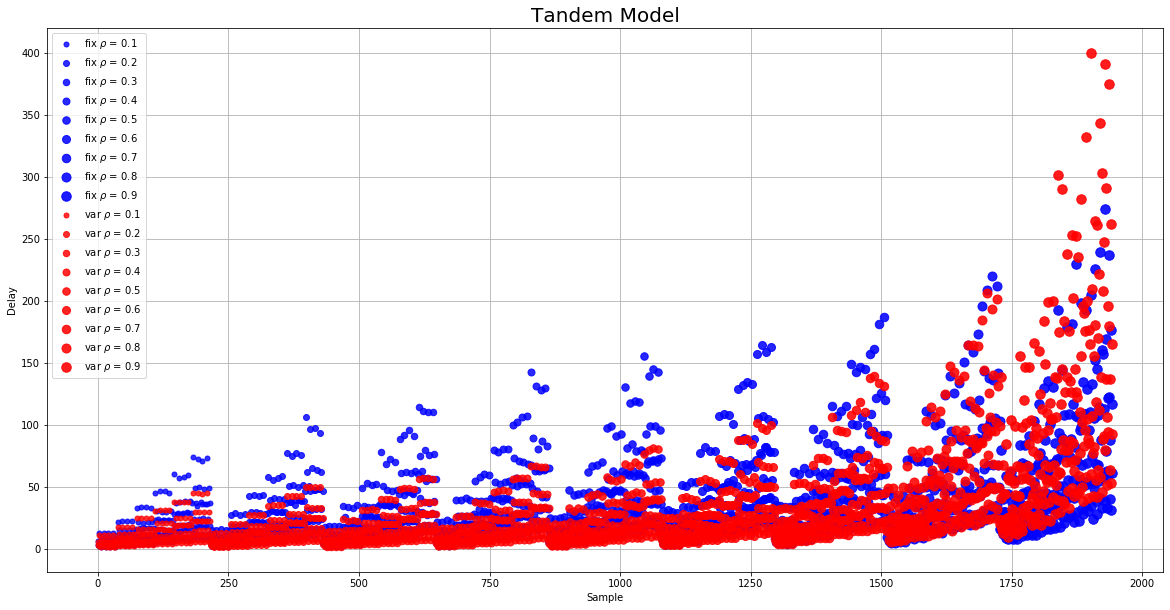

In [49]:
a = fix[(fix.RHOS==0.1)].loc[:,'RHOS': 'PKTSIZE']
# fix[(fix.RHOS==0.2)].loc[:,'RHOS': 'PKTSIZE']
dir(a)
a.index

plt.figure(figsize=(20, 10))
plt.xlabel('Sample')
plt.ylabel('Delay')
plt.title('Tandem Model', fontsize=20)

plt.plot(fix[(fix.RHOS==0.1)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.1)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.1', markersize=10, alpha =.81)
plt.plot(fix[(fix.RHOS==0.2)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.2)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.2', markersize=12, alpha =.82)
plt.plot(fix[(fix.RHOS==0.3)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.3)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.3', markersize=13, alpha =.83)
plt.plot(fix[(fix.RHOS==0.4)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.4)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.4', markersize=14, alpha =.84)
plt.plot(fix[(fix.RHOS==0.5)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.5)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.5', markersize=15, alpha =.85)
plt.plot(fix[(fix.RHOS==0.6)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.6)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.6', markersize=16, alpha =.86)
plt.plot(fix[(fix.RHOS==0.7)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.7)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.7', markersize=17, alpha =.87)
plt.plot(fix[(fix.RHOS==0.8)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.8)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.8', markersize=18, alpha =.88)
plt.plot(fix[(fix.RHOS==0.9)].loc[:,'delay'].index ,
         fix[(fix.RHOS==0.9)].loc[:,'delay'], '.b', label=r'fix $\rho$ = 0.9', markersize=19, alpha =.89)

plt.plot(fix[(fix.RHOS==0.1)].loc[:,'delay'].index ,
         var[(var.RHOS==0.1)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.1', markersize=10, alpha =.82)
plt.plot(fix[(fix.RHOS==0.2)].loc[:,'delay'].index ,
         var[(var.RHOS==0.2)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.2', markersize=12, alpha =.82)
plt.plot(fix[(fix.RHOS==0.3)].loc[:,'delay'].index ,
         var[(var.RHOS==0.3)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.3', markersize=13, alpha =.83)
plt.plot(fix[(fix.RHOS==0.4)].loc[:,'delay'].index ,
         var[(var.RHOS==0.4)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.4', markersize=14, alpha =.84)
plt.plot(fix[(fix.RHOS==0.5)].loc[:,'delay'].index ,
         var[(var.RHOS==0.5)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.5', markersize=15, alpha =.85)
plt.plot(fix[(fix.RHOS==0.6)].loc[:,'delay'].index ,
         var[(var.RHOS==0.6)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.6', markersize=16, alpha =.86)
plt.plot(fix[(fix.RHOS==0.7)].loc[:,'delay'].index ,
         var[(var.RHOS==0.7)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.7', markersize=17, alpha =.87)
plt.plot(fix[(fix.RHOS==0.8)].loc[:,'delay'].index ,
         var[(var.RHOS==0.8)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.8', markersize=18, alpha =.88)
plt.plot(fix[(fix.RHOS==0.9)].loc[:,'delay'].index ,
         var[(var.RHOS==0.9)].loc[:,'delay'], '.r', label=r'var $\rho$ = 0.9', markersize=19, alpha =.89)
plt.legend()  
plt.grid()
plt.show()

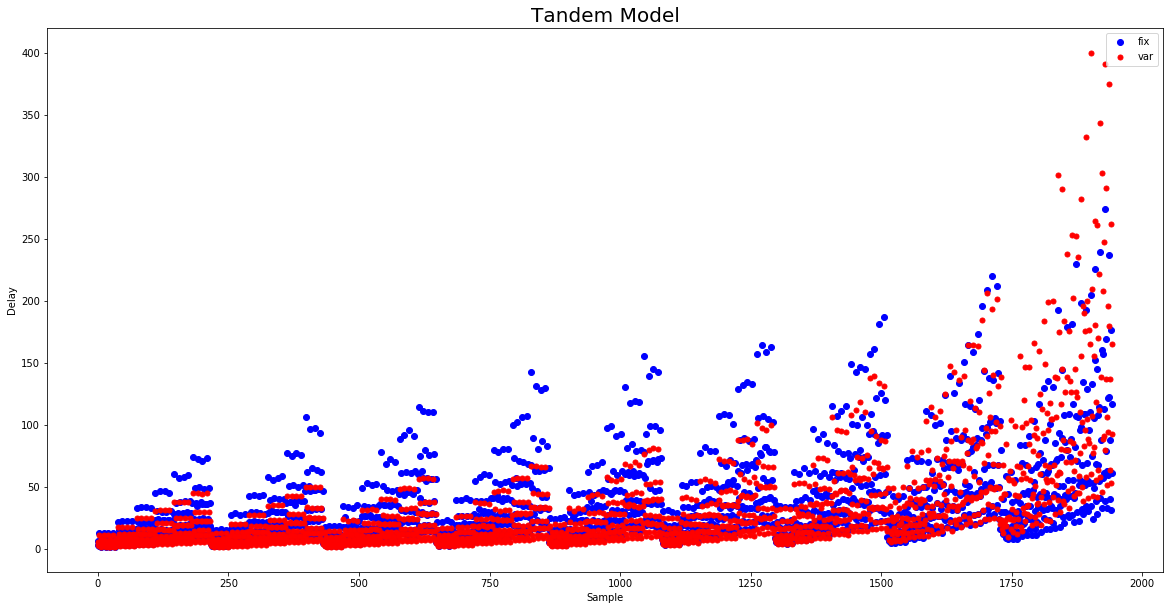

In [7]:
plt.figure(figsize=(20, 10))
plt.xlabel('Sample')
plt.ylabel('Delay')
plt.title('Tandem Model', fontsize=20)
plt.plot(y_fix, '.b', label='fix', markersize=12, )
plt.plot(var.loc[:,'delay'].values, '.r', label='var', markersize=10)
plt.legend()

In [8]:
import plotly.express as px
import numpy as np

fig = px.scatter_3d(fix , x='RHOS', y='NUM_STATIONS', z='delay', size='NUM_STATIONS',
                    color=fix['RHOS'])

fig.show()

In [9]:
def std(x, y):
    """Standard deviation between simulation model values and our estimates"""
    return math.sqrt(np.sum((x-y)**2) / (len(x) - 1))

In [10]:
# test samples
NUM_STATIONS_4 = [7, 12, 15, 18]

table_test = pd.read_csv('table_test_var_num_sta.csv', index_col=0)

def create_test_sample(table, sim_type, num_sta):
    """Create test variables for different num_sta in tandem"""
    test = {}
    for i in num_sta:
        key = sim_type + '_s' + str(i)
        test.update({key:table[(table.sim_type==sim_type) & (table_test.NUM_STATIONS==i)]})   
    return test

fix_test = create_test_sample(table_test, 'fix', NUM_STATIONS_4)
var_test = create_test_sample(table_test, 'var', NUM_STATIONS_4)    

In [11]:
def get_predictors(table_test):
    """
    return: Dict() with predictors for different num_sta cases  in tandem
    """
    x = {}
    for i in table_test.keys():
        key = i
        x.update({key:table_test[i].loc[:,'RHOS': 'PKTSIZE'].values})  
    return x   

In [12]:
def get_estimate(model, x):
    """
    return: Dict() with estimated prediction for different num_sta cases in tandem
    """
    estimate = {}
    for i in x.keys():
        key = i
        estimate.update({key:model.predict(x[i])})
    return estimate

## ДЕРЕВО РЕШЕНИЙ

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree = DecisionTreeRegressor(max_depth=15)
tree.fit(x_fix, y_fix);

In [15]:
x_test = get_predictors(fix_test)
tree_y = get_estimate(tree, x_test)

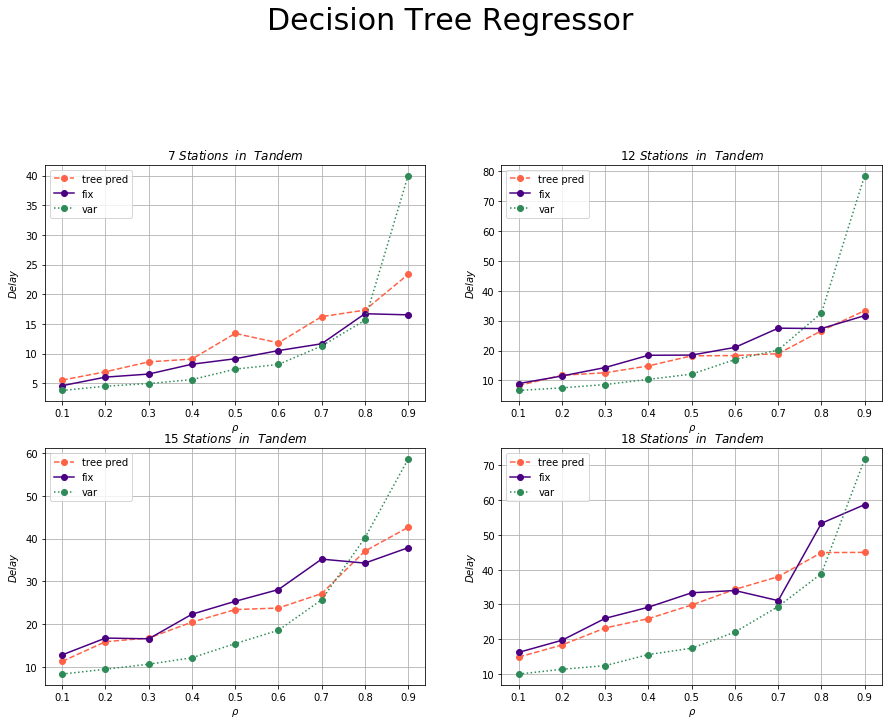

In [16]:
fig = plt.figure(figsize=(15, 20), )
plt.suptitle('Decision Tree Regressor', fontsize=30, va="center", ha="center")
# 7 Stations
ax1 = fig.add_subplot(421)
ax1 = plt.plot(fix_test['fix_s7'].loc[:, 'RHOS'].values, tree_y['fix_s7'], linestyle='--', color='tomato', 
               marker='o', label='tree pred')
ax1 = plt.plot(fix_test['fix_s7'].loc[:, 'RHOS'].values, fix_test['fix_s7'].loc[:, 'delay'].values, color='indigo', 
               marker='o', label='fix')
ax1 = plt.plot(var_test['var_s7'].loc[:, 'RHOS'].values, var_test['var_s7'].loc[:, 'delay'].values, linestyle=':',
               color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'7 $Stations$  $in$  $Tandem$')
plt.grid(True)
#  12 Stations
ax2 = fig.add_subplot(422)
ax2 = plt.plot(fix_test['fix_s12'].loc[:, 'RHOS'].values, tree_y['fix_s12'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax2 = plt.plot(fix_test['fix_s12'].loc[:, 'RHOS'].values, fix_test['fix_s12'].loc[:, 'delay'].values, 
               color='indigo', marker='o',label='fix')
ax2 = plt.plot(var_test['var_s12'].loc[:, 'RHOS'].values, var_test['var_s12'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'12 $Stations$  $in$  $Tandem$')
plt.grid(True)
#  15 Stations
ax3 = fig.add_subplot(423)
ax3 = plt.plot(fix_test['fix_s15'].loc[:, 'RHOS'].values, tree_y['fix_s15'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax3 = plt.plot(fix_test['fix_s15'].loc[:, 'RHOS'].values, fix_test['fix_s15'].loc[:, 'delay'].values, 
               color='indigo', marker='o', label='fix')
ax3 = plt.plot(var_test['var_s15'].loc[:, 'RHOS'].values, var_test['var_s15'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'15 $Stations$  $in$  $Tandem$')
plt.grid(True)

#  18 Stations
ax4 = fig.add_subplot(424)
ax4 = plt.plot(fix_test['fix_s18'].loc[:, 'RHOS'].values, tree_y['fix_s18'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax4 = plt.plot(fix_test['fix_s18'].loc[:, 'RHOS'].values, fix_test['fix_s18'].loc[:, 'delay'].values, 
               color='indigo', marker='o', label='fix')
ax4 = plt.plot(var_test['var_s18'].loc[:, 'RHOS'].values, var_test['var_s18'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'18 $Stations$  $in$  $Tandem$')
plt.grid(True)

In [17]:
# import seaborn as sns
# # sns.set_style("whitegrid")
# fig = plt.figure(figsize=(15, 10), )
# # 7 Stations
# ax1 = fig.add_subplot(421)
# ax1 = sns.pointplot(x=fix_test['fix_s7'].loc[:, 'RHOS'].values, y=tree_y['fix_s7'], linestyles='--', color='tomato', 
#                     markers='o')
# ax1 = sns.pointplot(x=fix_test['fix_s7'].loc[:, 'RHOS'].values, y=fix_test['fix_s7'].loc[:, 'delay'].values, color='indigo', 
#                     markers='o', label='fix')
# ax1 = sns.pointplot(x=var_test['var_s7'].loc[:, 'RHOS'].values, y=var_test['var_s7'].loc[:, 'delay'].values, linestyles=':',
#                     color='seagreen', markers='o', label='var')
# # ax1.legend(['pred', 'fix', 'var'])
# plt.xlabel(r'$\rho$')
# plt.ylabel(r'$Delay$')
# plt.title(r'7 $Stations$  $in$  $Tandem$')
# ax1.grid(True)
# #  12 Stations
# ax2 = fig.add_subplot(422)
# ax2 = sns.pointplot(x=fix_test['fix_s12'].loc[:, 'RHOS'].values, y=tree_y['fix_s12'], linestyles='--', 
#                     color='tomato', markers='o')
# ax2 = sns.pointplot(x=fix_test['fix_s12'].loc[:, 'RHOS'].values, y=fix_test['fix_s12'].loc[:, 'delay'].values, 
#                     color='indigo', markers='o')
# ax2 = sns.pointplot(x=var_test['var_s12'].loc[:, 'RHOS'].values, y=var_test['var_s12'].loc[:, 'delay'].values, 
#                     linestyles=':', color='seagreen', markers='o')
# plt.xlabel(r'$\rho$')
# plt.ylabel(r'$Delay$')
# plt.title(r'12 $Stations$  $in$  $Tandem$')
# ax2.grid(True)
# #  15 Stations
# ax3 = fig.add_subplot(425)
# ax3 = sns.pointplot(x=fix_test['fix_s15'].loc[:, 'RHOS'].values, y=tree_y['fix_s15'], linestyles='--', 
#                     color='tomato', markers='o')
# ax3 = sns.pointplot(x=fix_test['fix_s15'].loc[:, 'RHOS'].values, y=fix_test['fix_s15'].loc[:, 'delay'].values, 
#                     color='indigo', markers='o')
# ax3 = sns.pointplot(x=var_test['var_s15'].loc[:, 'RHOS'].values, y=var_test['var_s15'].loc[:, 'delay'].values, 
#                     linestyles=':', color='seagreen', markers='o')
# plt.xlabel(r'$\rho$')
# plt.ylabel(r'$Delay$')
# plt.title(r'15 $Stations$  $in$  $Tandem$')
# ax3.grid(True)

# #  18 Stations
# ax4 = fig.add_subplot(426)
# ax4 = sns.pointplot(x=fix_test['fix_s18'].loc[:, 'RHOS'].values, y=tree_y['fix_s18'], linestyles='--', 
#                     color='tomato', markers='o')
# ax4 = sns.pointplot(x=fix_test['fix_s18'].loc[:, 'RHOS'].values, y=fix_test['fix_s18'].loc[:, 'delay'].values, 
#                     color='indigo', markers='o')
# ax4 = sns.pointplot(x=var_test['var_s18'].loc[:, 'RHOS'].values, y=var_test['var_s18'].loc[:, 'delay'].values, 
#                     linestyles=':', color='seagreen', markers='o')
# plt.xlabel(r'$\rho$')
# plt.ylabel(r'$Delay$')
# plt.title(r'18 $Stations$  $in$  $Tandem$')
# ax4.legend(['pred', 'fix', 'var'])
# ax4.grid(True)



In [18]:
def get_metrics(vec1, vec2):
    """
    return: 1) Standard deviation
            2) Correlation (matrix)
            3) Determination coefficient
    """
    _std = std(vec1, vec2)
    r = np.corrcoef(vec1, vec2)
    r2 = r2_score(vec1, vec2)
    return [_std, r, r2]

def get_metrcis_table(var_test, fix_test, y):
    """
    return: Dict() with metrics for different num_sta
    """
    v_key = list(var_test.keys())
    f_key = list(fix_test.keys())
    table = {}
    for i in range(len(f_key)):
        # var value
        var_std, var_r, var_r2 = get_metrics(var_test[v_key[i]].loc[:, 'delay'].values,
                                             fix_test[f_key[i]].loc[:, 'delay'].values)
        # prediction values
        pred_std, pred_r, pred_r2 = get_metrics(y[f_key[i]], 
                                                fix_test[f_key[i]].loc[:, 'delay'].values)        
        data = {'STD':[var_std, pred_std], 'R': [var_r[0,1], pred_r[0,1]], 'R2': [var_r2, pred_r2]}
        df = pd.DataFrame(data, index=['VAR', 'PRED'])
        table.update({f_key[i]:df})
    return table

In [19]:
tree_metrics_table = get_metrcis_table(var_test, fix_test, tree_y)


In [20]:
def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            plt.annotate('{:.4}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

def draw_bar(table, x_test, metric):
    key = list(x_test.keys())
    labels = [key[i].replace('fix_', '') for i in range(len(key))]

    var = [table[i][metric][0] for i in key]
    pred = [table[i][metric][1] for i in key]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    var = plt.bar(x - width/2, var, width, label='var', color='seagreen')
    pred = plt.bar(x + width/2, pred, width, label='prediction', color='tomato')
   
    plt.legend()
    plt.tight_layout()
    plt.xlabel(r'$Stations$')
    plt.ylabel(r'$' + metric +'$')
    plt.xticks(x, labels)   
    
    autolabel(var)
    autolabel(pred)
    plt.show()
    

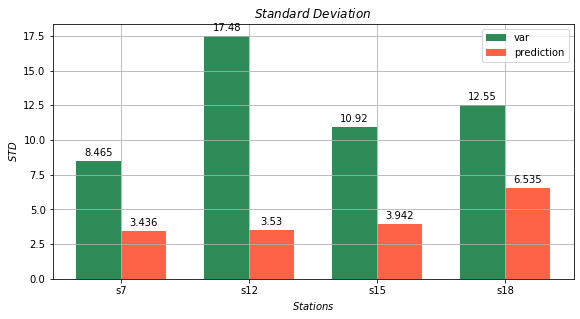

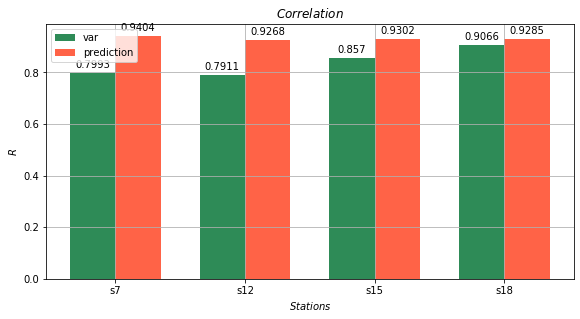

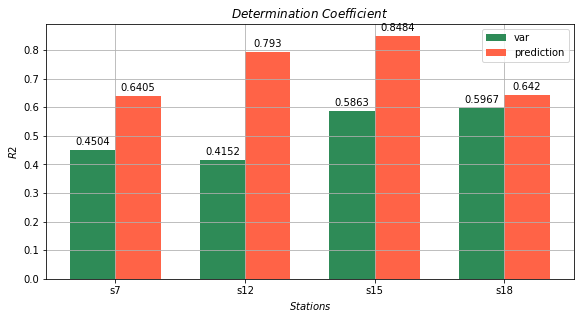

In [59]:
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Standard$ $Deviation$')
draw_bar(tree_metrics_table, x_test, 'STD')
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Correlation$')
draw_bar(tree_metrics_table, x_test, 'R')
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Determination$ $Coefficient$')
draw_bar(tree_metrics_table, x_test, 'R2')



## Градиентный бустинг

In [22]:
from sklearn.ensemble import GradientBoostingRegressor


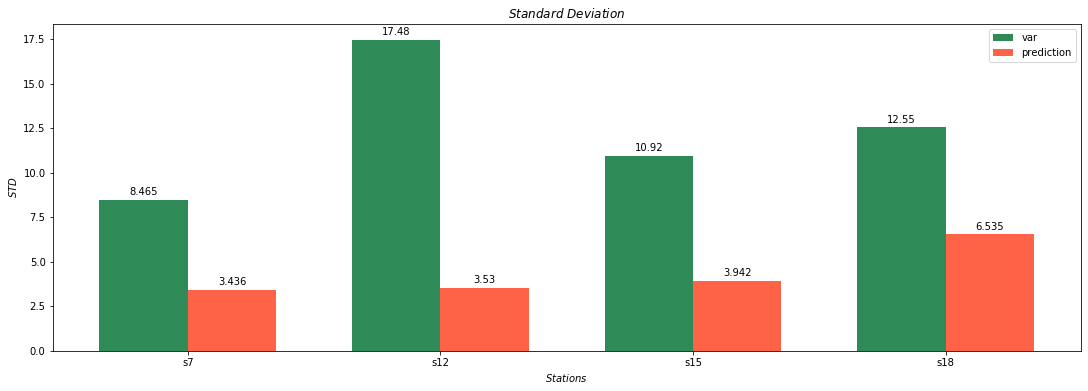

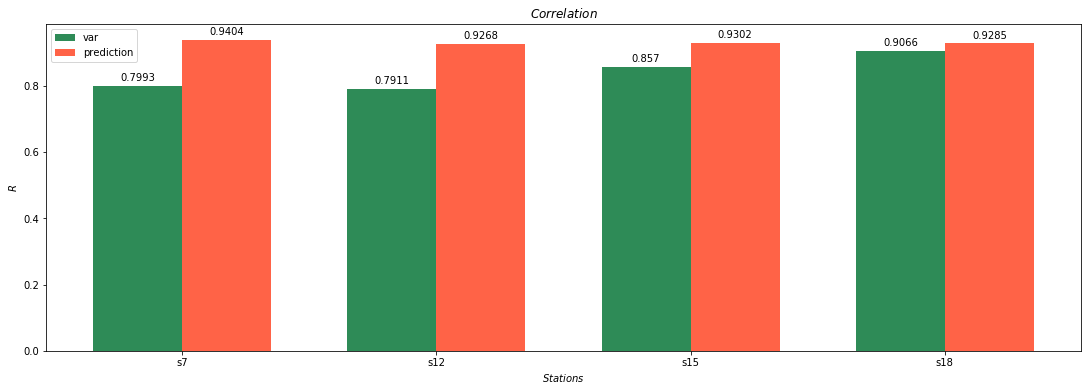

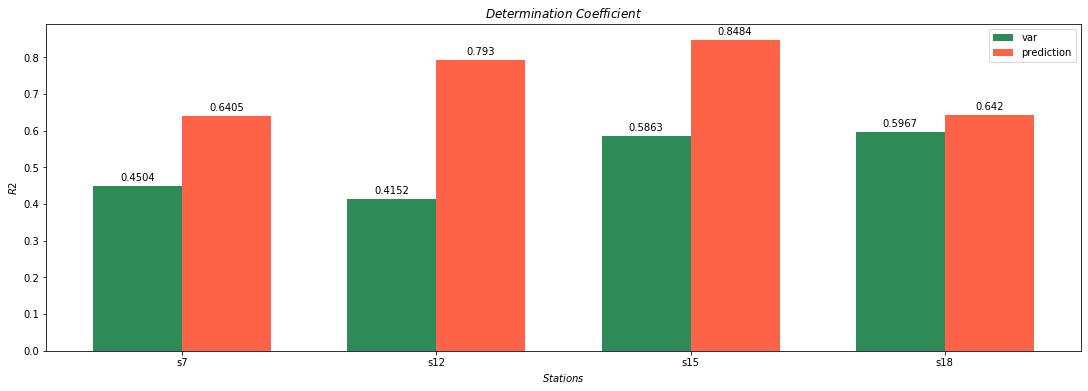

In [23]:
fig = plt.figure(figsize=(15, 10), )
axs = plt.subplot(211)
plt.title(r'$Standard$ $Deviation$')
draw_bar(tree_metrics_table, x_test, 'STD')
fig = plt.figure(figsize=(15, 10), )
axs = plt.subplot(211)
plt.title(r'$Correlation$')
draw_bar(tree_metrics_table, x_test, 'R')
fig = plt.figure(figsize=(15, 10), )
axs = plt.subplot(211)
plt.title(r'$Determination$ $Coefficient$')
draw_bar(tree_metrics_table, x_test, 'R2')

In [24]:
gb = GradientBoostingRegressor(max_depth=18)
gb.fit(x_fix, y_fix);

In [25]:
x_test = get_predictors(fix_test)
gb_y = get_estimate(gb, x_test)


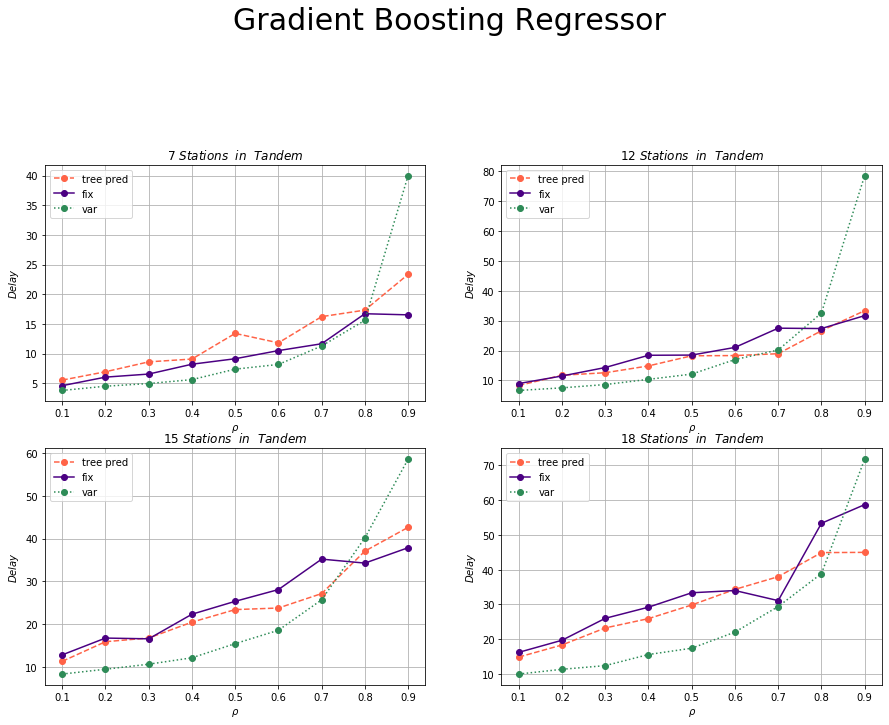

In [26]:
fig = plt.figure(figsize=(15, 20), )
plt.suptitle('Gradient Boosting Regressor', fontsize=30, va="center", ha="center")
# 7 Stations
ax1 = fig.add_subplot(421)
ax1 = plt.plot(fix_test['fix_s7'].loc[:, 'RHOS'].values, gb_y['fix_s7'], linestyle='--', color='tomato', 
               marker='o', label='tree pred')
ax1 = plt.plot(fix_test['fix_s7'].loc[:, 'RHOS'].values, fix_test['fix_s7'].loc[:, 'delay'].values, color='indigo', 
               marker='o', label='fix')
ax1 = plt.plot(var_test['var_s7'].loc[:, 'RHOS'].values, var_test['var_s7'].loc[:, 'delay'].values, linestyle=':',
               color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'7 $Stations$  $in$  $Tandem$')
plt.grid(True)
#  12 Stations
ax2 = fig.add_subplot(422)
ax2 = plt.plot(fix_test['fix_s12'].loc[:, 'RHOS'].values, gb_y['fix_s12'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax2 = plt.plot(fix_test['fix_s12'].loc[:, 'RHOS'].values, fix_test['fix_s12'].loc[:, 'delay'].values, 
               color='indigo', marker='o',label='fix')
ax2 = plt.plot(var_test['var_s12'].loc[:, 'RHOS'].values, var_test['var_s12'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'12 $Stations$  $in$  $Tandem$')
plt.grid(True)
#  15 Stations
ax3 = fig.add_subplot(423)
ax3 = plt.plot(fix_test['fix_s15'].loc[:, 'RHOS'].values, gb_y['fix_s15'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax3 = plt.plot(fix_test['fix_s15'].loc[:, 'RHOS'].values, fix_test['fix_s15'].loc[:, 'delay'].values, 
               color='indigo', marker='o', label='fix')
ax3 = plt.plot(var_test['var_s15'].loc[:, 'RHOS'].values, var_test['var_s15'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'15 $Stations$  $in$  $Tandem$')
plt.grid(True)

#  18 Stations
ax4 = fig.add_subplot(424)
ax4 = plt.plot(fix_test['fix_s18'].loc[:, 'RHOS'].values, gb_y['fix_s18'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax4 = plt.plot(fix_test['fix_s18'].loc[:, 'RHOS'].values, fix_test['fix_s18'].loc[:, 'delay'].values, 
               color='indigo', marker='o', label='fix')
ax4 = plt.plot(var_test['var_s18'].loc[:, 'RHOS'].values, var_test['var_s18'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'18 $Stations$  $in$  $Tandem$')
plt.grid(True)


In [27]:
gb_metrics_table = get_metrcis_table(var_test, fix_test, gb_y)

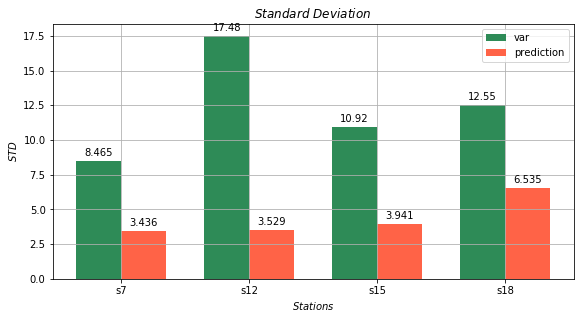

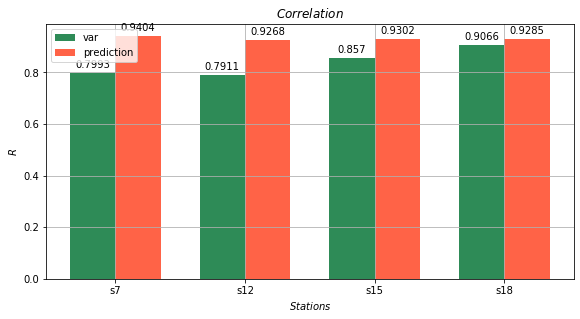

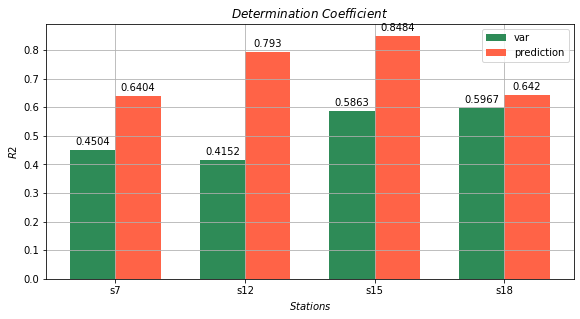

In [60]:
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Standard$ $Deviation$')
draw_bar(gb_metrics_table, x_test, 'STD')
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Correlation$')
draw_bar(gb_metrics_table, x_test, 'R')
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Determination$ $Coefficient$')
draw_bar(gb_metrics_table, x_test, 'R2')


In [29]:
# # var values
# var_std = std(var_test.loc[:,'delay'].values, fix_test.loc[:,'delay'].values)
# var_r = np.corrcoef(var_test.loc[:,'delay'].values, fix_test.loc[:,'delay'].values)
# var_r2 = r2_score(var_test.loc[:,'delay'].values, fix_test.loc[:,'delay'].values)

# # prediction values
# pred_std = std(gb_y_estimate, fix_test.loc[:,'delay'].values)
# pred_r = np.corrcoef(gb_y_estimate, fix_test.loc[:,'delay'].values)
# pred_r2 = r2_score(fix_test.loc[:,'delay'].values, gb_y_estimate)

# data = {'STD':[var_std, pred_std], 'R': [var_r[0,1], pred_r[0,1]], 'R2': [var_r2, pred_r2]}
# tree_df = pd.DataFrame(data, index=['VAR', 'PRED'])
# tree_df

In [30]:
# gb_metrics_table = get_metrcis_table(var_test, fix_test, gb_y)

In [31]:
# fig = plt.figure(figsize=(15, 10), )
# axs = plt.subplot(211)
# plt.title(r'$Standard$ $Deviation$')
# draw_bar(gb_metrics_table, x_test, 'STD')
# fig = plt.figure(figsize=(15, 10), )
# axs = plt.subplot(211)
# plt.title(r'$Correlation$')
# draw_bar(gb_metrics_table, x_test, 'R')
# fig = plt.figure(figsize=(15, 10), )
# axs = plt.subplot(211)
# plt.title(r'$Determination$ $Coefficient$')
# draw_bar(gb_metrics_table, x_test, 'R2')

## Искусственные нейроные сети

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

**Нормализация входных тренировочных и тестовых данных**

Для лучшей сходимости данных необходимо привести данные к одному диапазону.

In [34]:
def normalize(table, stat):
    """Prepare data for ANN"""
    return (table - stat.loc['mean',:].transpose())/ stat.loc['std',:].transpose()

***Тренирочные данные:***

In [35]:
fix_normalize = normalize(fix.loc[:,'RHOS': 'PKTSIZE'], fix.loc[:,'RHOS': 'PKTSIZE'].describe())
x_train = fix_normalize.loc[:,'RHOS': 'PKTSIZE'].values
y_train = fix.loc[:,'delay'].values

***Тестовые данные:***

In [36]:
# fix_test_normalize = normalize(fix_test.loc[:,'RHOS': 'PKTSIZE'], fix.loc[:,'RHOS': 'PKTSIZE'].describe())
# x_test = fix_test_normalize.loc[:,'RHOS': 'PKTSIZE'].values
# y_test = fix_test.loc[:,'delay'].values

In [37]:
def prepare_test_data(fix_test):
    x = {}
    for i in fix_test.keys():
        key = i
        norm_data = normalize(fix_test[i].loc[:,'RHOS': 'PKTSIZE'], fix.loc[:,'RHOS': 'PKTSIZE'].describe())
        x.update({key:norm_data.loc[:,'RHOS': 'PKTSIZE'].values})  
    return x
    

In [38]:
x_test = prepare_test_data(fix_test)
# tree_y = get_estimate(tree, x_test)
# # data = get_predictors(fix_test)
# fix_test['fix_s7']
# # fix_test.keys()
# normalize(fix_test['fix_s7'].loc[:,'RHOS': 'PKTSIZE'], fix_test['fix_s7'].loc[:,'RHOS': 'PKTSIZE'].describe())
# table = fix_test['fix_s7'].loc[:,'RHOS': 'PKTSIZE']
# stat = fix_test['fix_s7'].loc[:,'RHOS': 'PKTSIZE'].describe()
# stat
# # (table - stat.loc['mean',:].transpose())/ stat.loc['std',:].transpose()
# # stat.loc['mean',:].transpose()
# # stat.loc['std',:].transpose()
# x_test
# normalize(fix_test['fix_s7'].loc[:,'RHOS': 'PKTSIZE'], fix.loc[:,'RHOS': 'PKTSIZE'].describe())
# x_test

Построим **модель сети**

Нейронная сеть будет иметь один скрытый слой с сигмоидальной функцией активации. В качестве метода оптимизации был выбран алгоритм **Адама**.

In [39]:
def build_model(size):
    model = keras.Sequential([
        # Input Layer
        layers.Dense(25, activation='relu', use_bias=True, input_shape=[size]),
        # Hidden Layer
        layers.Dense(25, activation='sigmoid', use_bias=True,),
        # Output layer
        layers.Dense(1)])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [40]:
model = build_model(len(fix.loc[:,'RHOS': 'PKTSIZE'].keys()))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
 %%time
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
EPOCHS = 1000
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, 
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Wall time: 32.2 s


In [42]:
def get_estimate1(model, x):
    """
    return: Dict() with estimated prediction for different num_sta cases in tandem
    """
    estimate = {}
    for i in x.keys():
        key = i
        estimate.update({key:model.predict(x[i]).flatten()})
    return estimate

In [170]:
# ann_y_estimate = model.predict(x_test).flatten()
ann_y = get_estimate1(model, x_test)
# model.predict(x_test['fix_s7']).flatten()
# ann_y

In [208]:
%%time
u = model.predict(np.array([[-1.54879483, -1.07321394, 1.06078157, -1.22442982, -1.06876997]]))
x_test

Wall time: 4 ms


{'fix_s7': array([[-1.54879483, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [-1.16159612, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [-0.77439742, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [-0.38719871, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [ 0.        , -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [ 0.38719871, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [ 0.77439742, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [ 1.16159612, -1.07321394, -1.06078157, -1.22442982, -1.06876997],
        [ 1.54879483, -1.07321394, -1.06078157, -1.22442982, -1.06876997]]),
 'fix_s12': array([[-1.54879483, -0.0975649 , -1.06078157, -1.22442982, -1.06876997],
        [-1.16159612, -0.0975649 , -1.06078157, -1.22442982, -1.06876997],
        [-0.77439742, -0.0975649 , -1.06078157, -1.22442982, -1.06876997],
        [-0.38719871, -0.0975649 , -1.06078157, -1.22442982, -1.06876997],
  

In [44]:
# plt.figure()
# plt.plot(fix_test.loc[:,'RHOS'].values, ann_y_estimate, '--or', label='prediction')
# plt.plot(fix_test.loc[:,'RHOS'].values,fix_test.loc[:,'delay'].values,'-ob', label='fix')
# plt.plot(var_test.loc[:,'RHOS'].values, var_test.loc[:,'delay'].values,'--og', label='var')

# plt.xlabel(r'$\rho$')
# plt.ylabel('Delay')
# plt.title('Artificial Neural Network')
# plt.legend()
# plt.grid()

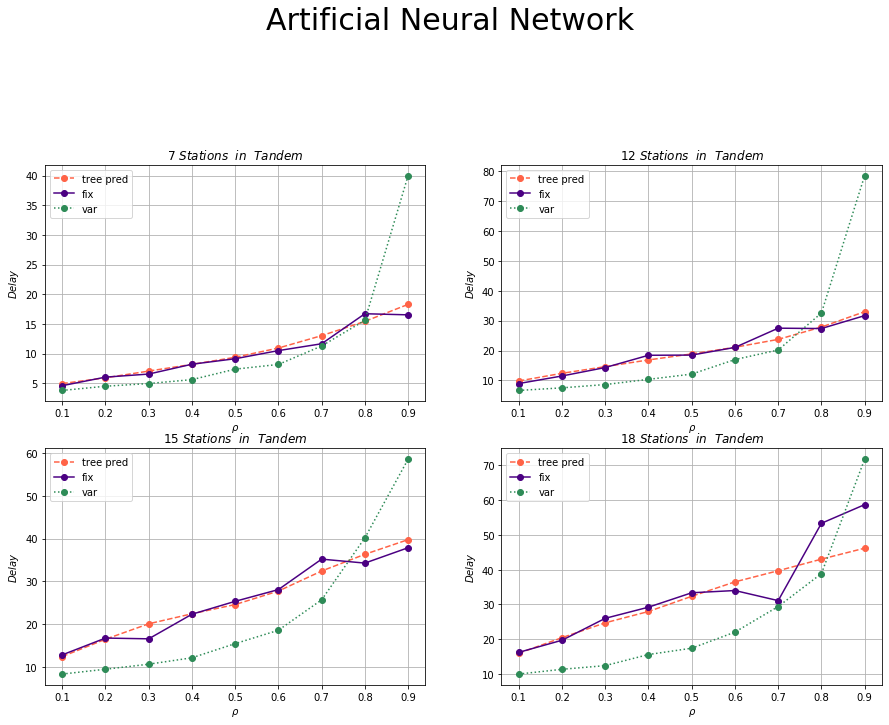

In [45]:
fig = plt.figure(figsize=(15, 20), )
plt.suptitle('Artificial Neural Network', fontsize=30, va="center", ha="center")
# 7 Stations
ax1 = fig.add_subplot(421)
ax1 = plt.plot(fix_test['fix_s7'].loc[:, 'RHOS'].values, ann_y['fix_s7'], linestyle='--', color='tomato', 
               marker='o', label='tree pred')
ax1 = plt.plot(fix_test['fix_s7'].loc[:, 'RHOS'].values, fix_test['fix_s7'].loc[:, 'delay'].values, color='indigo', 
               marker='o', label='fix')
ax1 = plt.plot(var_test['var_s7'].loc[:, 'RHOS'].values, var_test['var_s7'].loc[:, 'delay'].values, linestyle=':',
               color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'7 $Stations$  $in$  $Tandem$')
plt.grid(True)
#  12 Stations
ax2 = fig.add_subplot(422)
ax2 = plt.plot(fix_test['fix_s12'].loc[:, 'RHOS'].values, ann_y['fix_s12'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax2 = plt.plot(fix_test['fix_s12'].loc[:, 'RHOS'].values, fix_test['fix_s12'].loc[:, 'delay'].values, 
               color='indigo', marker='o',label='fix')
ax2 = plt.plot(var_test['var_s12'].loc[:, 'RHOS'].values, var_test['var_s12'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'12 $Stations$  $in$  $Tandem$')
plt.grid(True)
#  15 Stations
ax3 = fig.add_subplot(423)
ax3 = plt.plot(fix_test['fix_s15'].loc[:, 'RHOS'].values, ann_y['fix_s15'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax3 = plt.plot(fix_test['fix_s15'].loc[:, 'RHOS'].values, fix_test['fix_s15'].loc[:, 'delay'].values, 
               color='indigo', marker='o', label='fix')
ax3 = plt.plot(var_test['var_s15'].loc[:, 'RHOS'].values, var_test['var_s15'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'15 $Stations$  $in$  $Tandem$')
plt.grid(True)

#  18 Stations
ax4 = fig.add_subplot(424)
ax4 = plt.plot(fix_test['fix_s18'].loc[:, 'RHOS'].values, ann_y['fix_s18'], linestyle='--', 
               color='tomato', marker='o', label='tree pred')
ax4 = plt.plot(fix_test['fix_s18'].loc[:, 'RHOS'].values, fix_test['fix_s18'].loc[:, 'delay'].values, 
               color='indigo', marker='o', label='fix')
ax4 = plt.plot(var_test['var_s18'].loc[:, 'RHOS'].values, var_test['var_s18'].loc[:, 'delay'].values, 
               linestyle=':', color='seagreen', marker='o', label='var')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Delay$')
plt.title(r'18 $Stations$  $in$  $Tandem$')
plt.grid(True)


In [46]:
ann_metrics_table = get_metrcis_table(var_test, fix_test, ann_y)

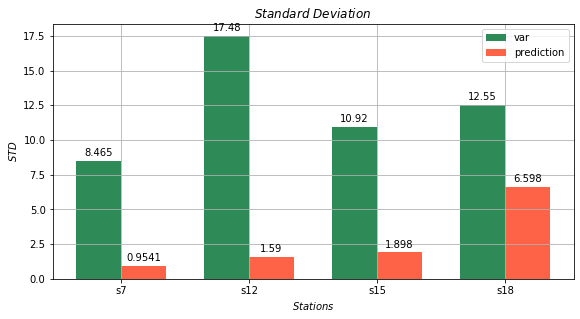

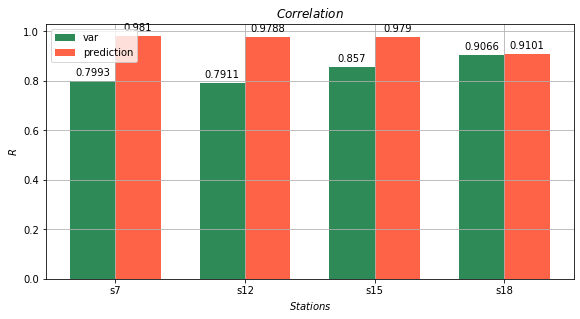

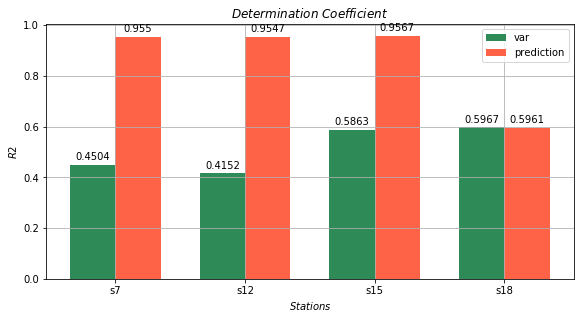

In [61]:
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Standard$ $Deviation$')
draw_bar(ann_metrics_table, x_test, 'STD')
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Correlation$')
draw_bar(ann_metrics_table, x_test, 'R')
fig = plt.figure(figsize=(8, 8), )
axs = plt.subplot(211)
plt.grid()
plt.title(r'$Determination$ $Coefficient$')
draw_bar(ann_metrics_table, x_test, 'R2')


In [48]:
# # var values
# var_std = std(var_test.loc[:,'delay'].values, fix_test.loc[:,'delay'].values)
# var_r = np.corrcoef(var_test.loc[:,'delay'].values, fix_test.loc[:,'delay'].values)
# var_r2 = r2_score(var_test.loc[:,'delay'].values, fix_test.loc[:,'delay'].values)

# # prediction values
# pred_std = std(ann_y_estimate, fix_test.loc[:,'delay'].values)
# pred_r = np.corrcoef(ann_y_estimate, fix_test.loc[:,'delay'].values)
# pred_r2 = r2_score(fix_test.loc[:,'delay'].values, ann_y_estimate)

# data = {'STD':[var_std, pred_std], 'R': [var_r[0,1], pred_r[0,1]], 'R2': [var_r2, pred_r2]}
# ann_df = pd.DataFrame(data, index=['VAR', 'PRED'])
# ann_df